In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('svm_dataset-1.csv')

In [3]:
data.head()

,Feature 1,Feature 2,Target
0,-0.490097,0.037513,1
1,0.219836,-0.399650,1
2,-0.854565,-0.349471,0
3,-0.956407,-0.256714,0
4,-0.878756,-0.630345,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  1500 non-null   float64
 1   Feature 2  1500 non-null   float64
 2   Target     1500 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 35.3 KB


In [5]:
data.isnull().sum()

,0
Feature 1,0
Feature 2,0
Target,0


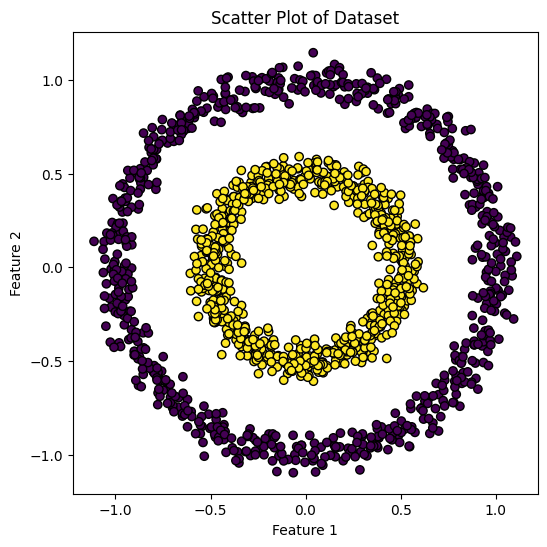

In [11]:
#let us see the distribution of the classes
plt.figure(figsize=(6, 6))
plt.scatter(data['Feature 1'], data['Feature 2'],c=data['Target'], cmap='viridis', edgecolor='k')
plt.title("Scatter Plot of Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

we absorve that there is no linear relation between classes.

so we can use the RBF Kernel

In [12]:
from sklearn.model_selection import train_test_split

# Features and target
X = data[['Feature 1', 'Feature 2']]
y = data['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training size: {X_train.shape}, Testing size: {X_test.shape}")

Training size: (1050, 2), Testing size: (450, 2)


In [13]:
from sklearn.svm import SVC

# Initialize the SVM model with RBF kernel
model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Gamma defines the influence of a single training example
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predictions
y_pred = model.predict(X_test)

# Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")

Confusion Matrix:
[[234   0]
 [  0 216]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       234
           1       1.00      1.00      1.00       216

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450

Accuracy Score: 1.00


The matrix indicates that all 234 samples of class 0 and all 216 samples of class 1 have been correctly classified.

There are no misclassifications, as evident by the zeros in the off-diagonal elements of the matrix.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


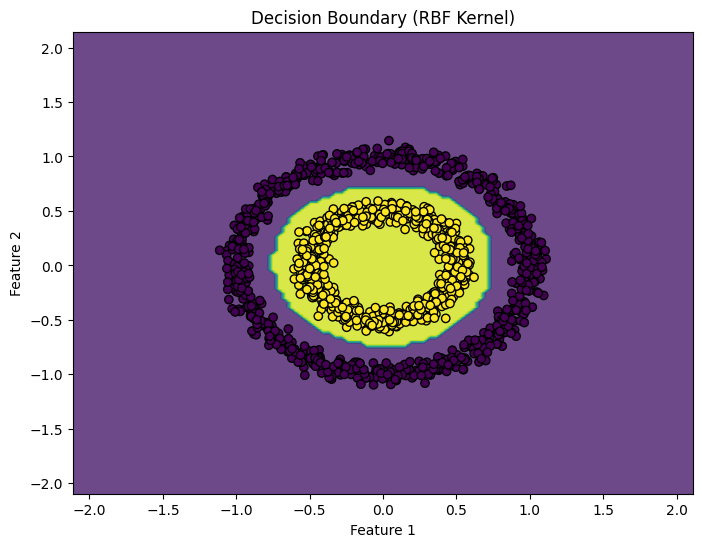

In [15]:
xx, yy = np.meshgrid(np.linspace(X['Feature 1'].min()-1, X['Feature 1'].max()+1, 100),
                     np.linspace(X['Feature 2'].min()-1, X['Feature 2'].max()+1, 100))

# Predict across the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X['Feature 1'], X['Feature 2'], c=y, edgecolor='k', cmap='viridis')
plt.title("Decision Boundary (RBF Kernel)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

The SVM model with the RBF kernel successfully separates the classes in this dataset. The perfect scores across all evaluation metrics suggest that the data is well-suited for the SVM with this kernel, and the decision boundary aligns perfectly with the data distribution. This result showcases the ability of the RBF kernel to handle non-linear separations effectively